<a href="https://www.kaggle.com/code/yasinsoylu123/heart-failure?scriptVersionId=116617939" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [104]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import sys
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [105]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')


In [106]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [107]:
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

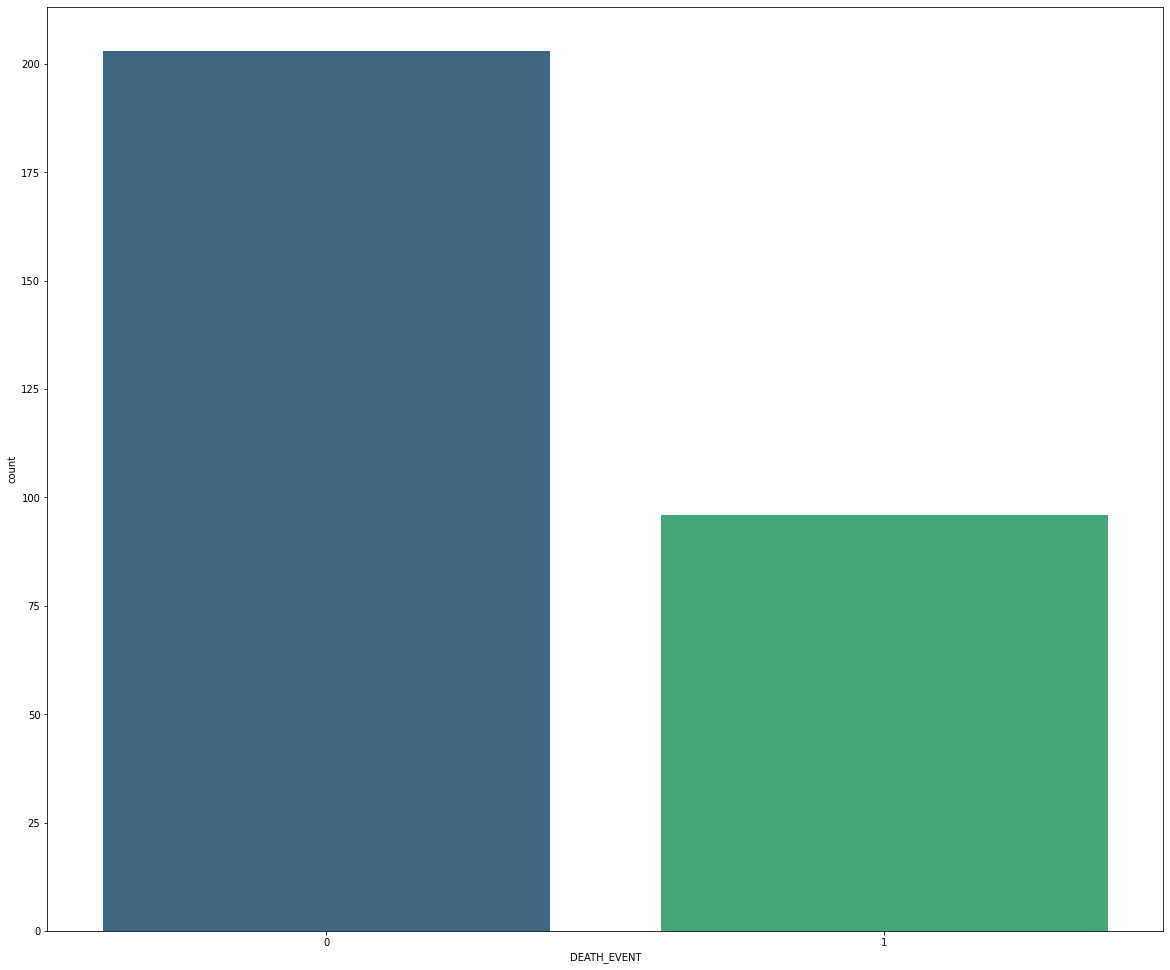

In [108]:
cols= ["#6daa9f","#774571"]
ax=sns.countplot(x= df["DEATH_EVENT"], palette= "viridis")
plt.show()

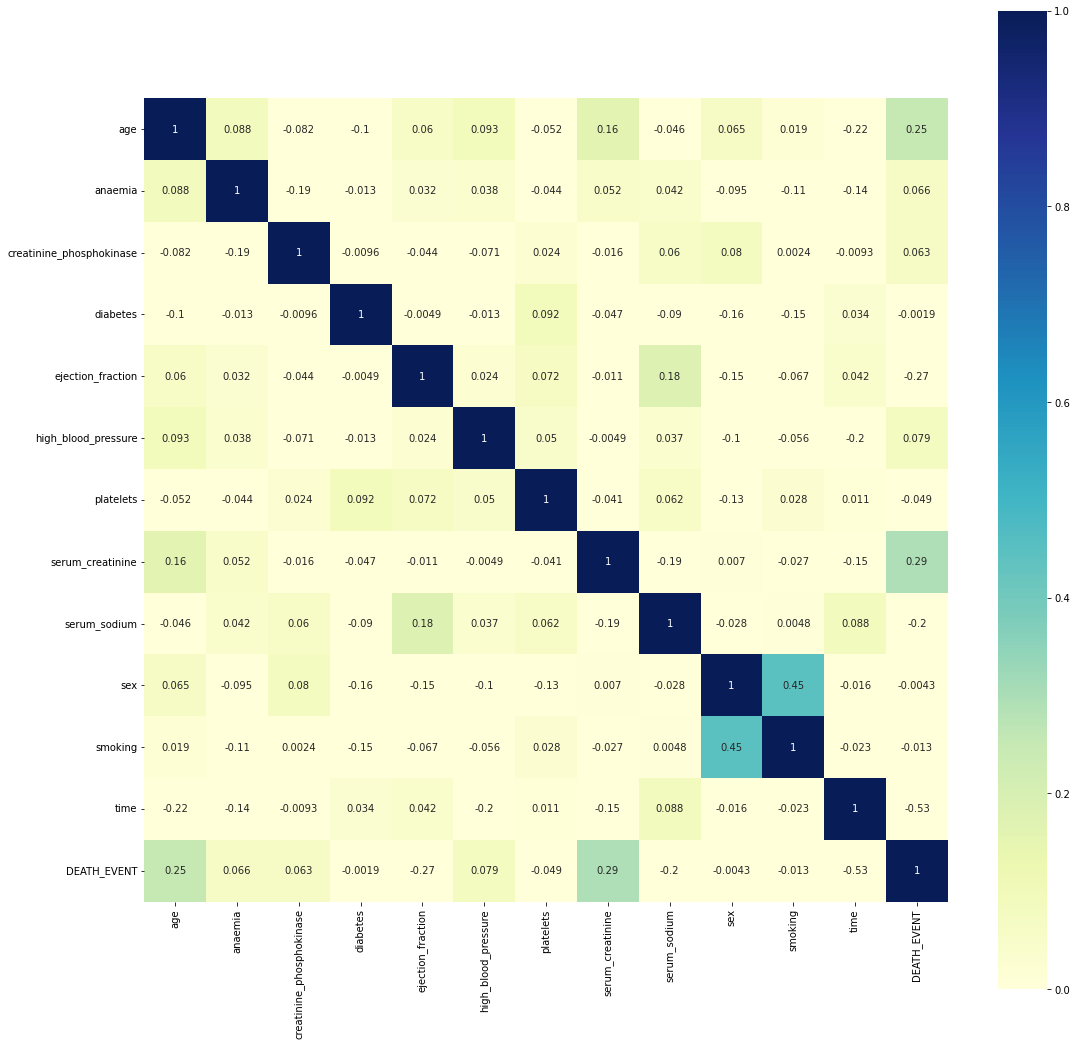

In [109]:
#Examaning a corelation matrix of all the features 
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

In [110]:
hist_data =[df["age"].values]
group_labels = ['age'] 
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

In [111]:
histogram=px.histogram(data_frame=df,x="age",nbins=100)


histogram.show()

In [112]:
histogram=px.histogram(data_frame=df,x="age",nbins=60,title="age for deadth",color="DEATH_EVENT")


histogram.show()

In [113]:
histogram=px.histogram(data_frame=df,x="ejection_fraction",nbins=60,color="DEATH_EVENT",height=500,width = 900)


histogram.show()

In [114]:
histogram=px.histogram(data_frame=df,x="ejection_fraction",nbins=60,color="sex",height=500,width = 900)


histogram.show()

In [115]:
histogram=px.histogram(data_frame=df,x="serum_creatinine",nbins=60,color="DEATH_EVENT",height=500,width = 900,marginal="violin")


histogram.show()

In [116]:
live = df[df["DEATH_EVENT"]==0]["age"]
dead = df[df["DEATH_EVENT"]==1]["age"]



hist_data = [live,dead]


group_labels = ['live', 'dead']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [117]:
live = df[df['DEATH_EVENT']==0]['serum_sodium']
dead = df[df['DEATH_EVENT']==1]['serum_sodium']


hist_data = [live,dead]
group_labels = ['live', 'dead']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.7)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [118]:
live = df[df['DEATH_EVENT']==0]['serum_creatinine']
dead = df[df['DEATH_EVENT']==1]['serum_creatinine']


hist_data = [live,dead]
group_labels = ['live', 'dead']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.3)
fig.update_layout(
    title_text="Analysis in serum creatinineon Survival Status")
fig.show()

In [119]:
pie_chart=px.pie(data_frame=df, values="sex",names="DEATH_EVENT",width=500,height=500,hole=.3)

pie_chart.show()

In [120]:
pie_chart=px.pie(data_frame=df, values="DEATH_EVENT",names="smoking",width=500,height=500)

pie_chart.show()

In [121]:
px.pie(data_frame=df, values="DEATH_EVENT",names="high_blood_pressure",width=500,height=500,template="presentation")


In [122]:
px.pie(data_frame=df, values="DEATH_EVENT",names="ejection_fraction",width=700,height=700,template="presentation",hole=0.3)


In [123]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]


smoking_yes_survi = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[df["DEATH_EVENT"]==1]



In [124]:
labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

In [125]:
labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

In [126]:
d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

In [127]:
labels1 = ['male','female']
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

fig = go.Figure(data=[go.Pie(labels=labels1, values=values1, hole=.4)])
fig.update_layout(
    title_text="Analysis on - gender")
fig.show()

In [128]:
labels2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = go.Figure(data=[go.Pie(labels=labels2, values=values2, hole=.4)])
fig.update_layout(
    title_text="Analysis on - gender")
fig.show()

In [129]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [130]:
fig = px.box(df, x="DEATH_EVENT", y="age",points="all",width=700,height=700)
fig.show()

In [131]:
fig = px.box(df, x="DEATH_EVENT", y="creatinine_phosphokinase",points="all",width=700,height=700)
fig.show()

In [132]:
fig = px.box(df, x="DEATH_EVENT", y="ejection_fraction",points="all",width=700,height=700)
fig.show()

In [133]:
fig = px.box(df, x="DEATH_EVENT", y="platelets",points="all",width=700,height=700)
fig.show()

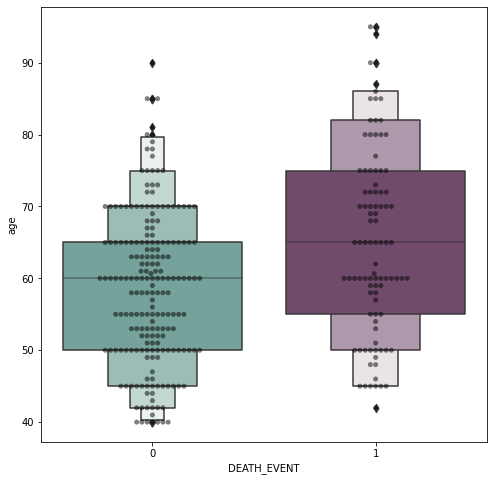

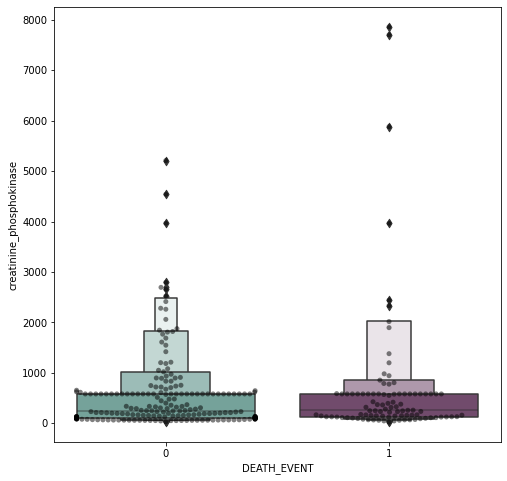

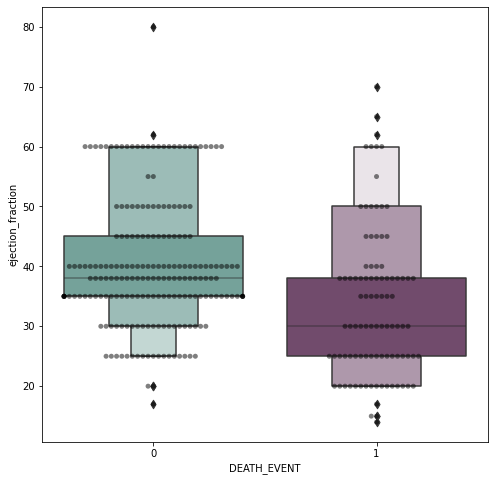

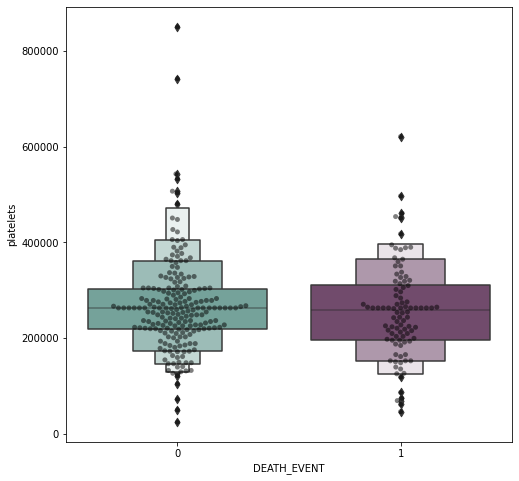

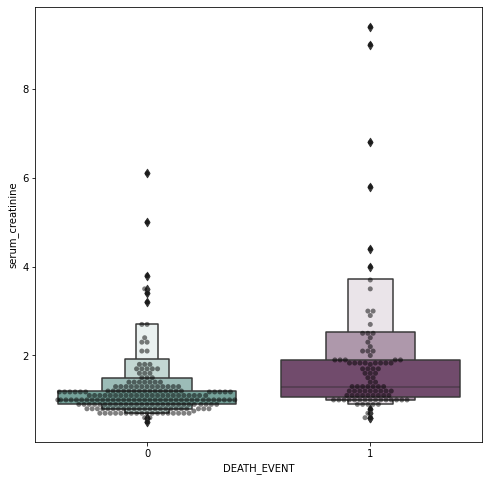

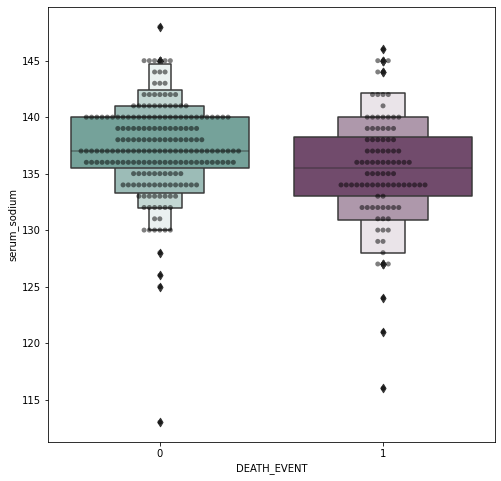

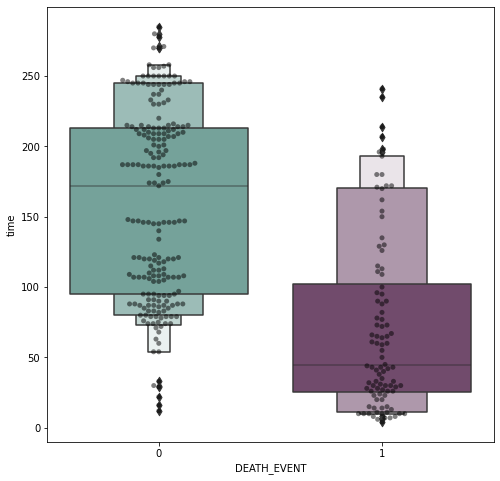

In [134]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[i], color="black", alpha=0.5)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[i], palette=cols)
    plt.show()

In [135]:
sun = df.groupby(['sex', 'diabetes', 'smoking', 'DEATH_EVENT'])['age'].count().reset_index()
sun.columns = [
    'sex', 
    'diabetes', 
    'smoking', 
    'DEATH_EVENT', 
    'count'
]

In [136]:
sun.loc[sun['sex'] == 0, 'sex'] = 'female'
sun.loc[sun['sex'] == 1, 'sex'] = 'male'
sun.loc[sun['smoking'] == 0, 'smoking'] = "doesn't smoke"
sun.loc[sun['smoking'] == 1, 'smoking'] = 'smoke'
sun.loc[sun['diabetes'] == 0, 'diabetes'] = "no diabetes"
sun.loc[sun['diabetes'] == 1, 'diabetes'] = 'diabetes'
sun.loc[sun['DEATH_EVENT'] == 0,'DEATH_EVENT'] = "ALIVE_EVENT"
sun.loc[sun['DEATH_EVENT'] == 1, 'DEATH_EVENT'] = 'DEATH_EVENT'

fig = px.sunburst(
    sun, 
    path=[
        'sex',
        'diabetes',
        'smoking', 
        'DEATH_EVENT'
    ], 
    values='count', 
    title='Sunburst chart for all patients',
    width=750,
    height=750)
fig.show()

In [137]:
fig = px.histogram(df, x="age", color="smoking", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"})
fig.show()

In [138]:
fig = px.scatter_3d(df, x='creatinine_phosphokinase', y='ejection_fraction', z="DEATH_EVENT",color="sex",    width=750,
    height=750)
fig.show()

In [139]:
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [140]:
from sklearn import preprocessing
col_names = list(X.columns)
print("columns names : ",col_names)

scaler = preprocessing.StandardScaler()
X_df= scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   


columns names :  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [141]:
X_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


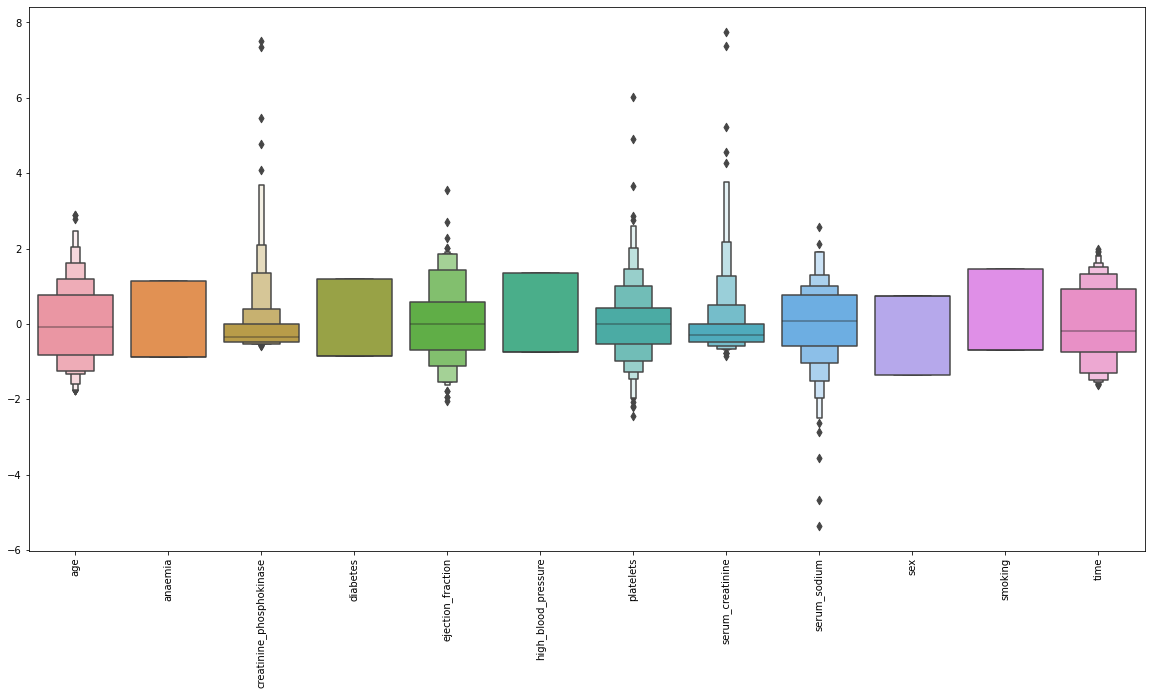

In [142]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)
plt.show()

In [143]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)


In [144]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [145]:
gnb.fit(X_train, y_train)
predicted=gnb.predict(X_test)
conf = confusion_matrix(y_test, predicted)

In [146]:
print (conf)

[[49  4]
 [22 15]]


In [147]:
accuracy_score(y_test, predicted)

0.7111111111111111

In [148]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        53
           1       0.79      0.41      0.54        37

    accuracy                           0.71        90
   macro avg       0.74      0.66      0.66        90
weighted avg       0.73      0.71      0.69        90



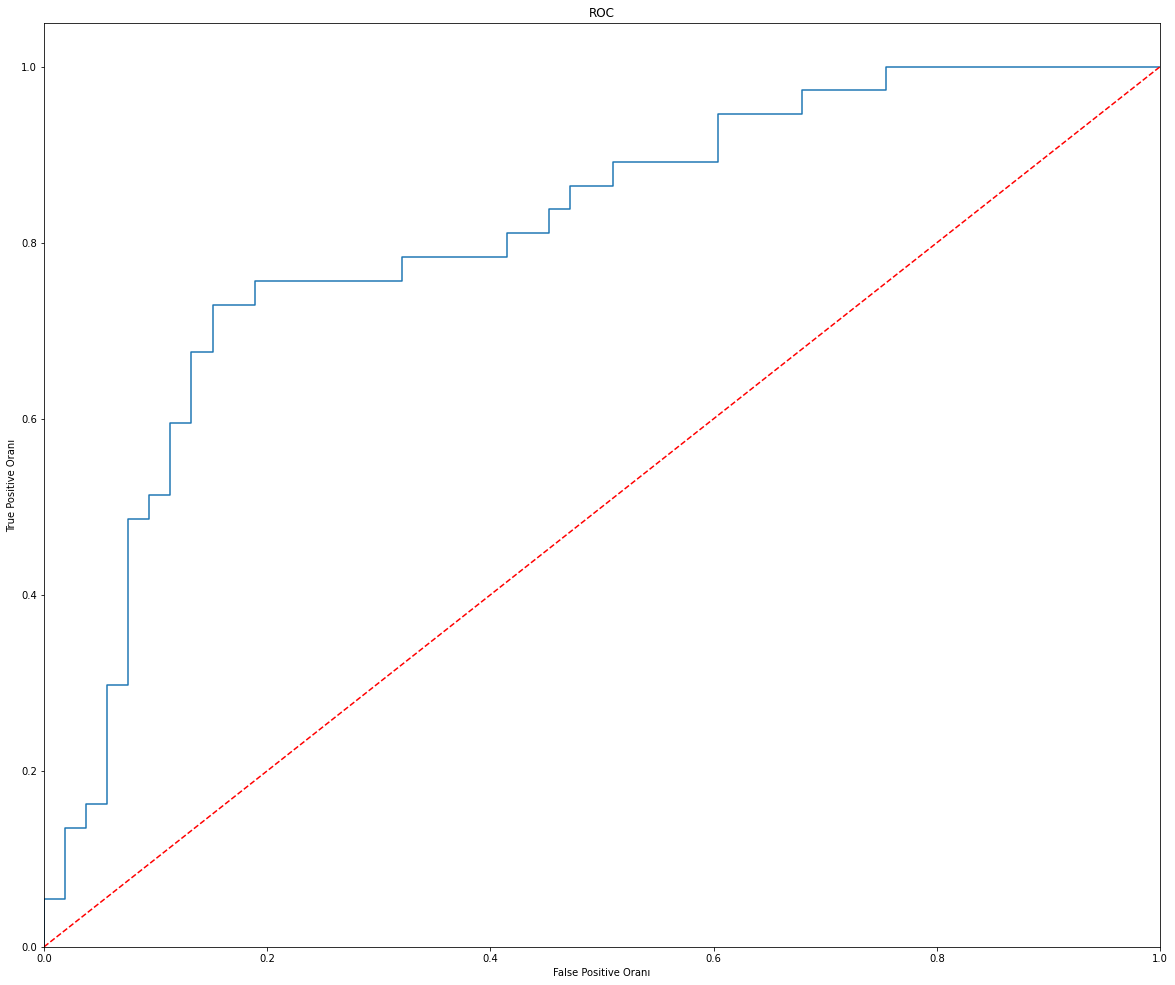

In [149]:
logit_roc_auc = roc_auc_score(y_test,gnb.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [150]:
cross_val_score(gnb, X_test, y_test, cv = 10).mean()

0.7

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb


In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier(n_neighbors=6))])

pipeline_gbm=Pipeline([('gbm_classifier',GradientBoostingClassifier(max_depth=5, random_state=1))])

pipeline_xgb=Pipeline([('xgb_classifier',xgb.XGBRFClassifier(max_depth=5, random_state=1,verbosity = 0))])

pipeline_lgb=Pipeline([('lgb_classifier',lgb.LGBMClassifier(max_depth=20, random_state=4))])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc,pipeline_knn,pipeline_gbm,pipeline_xgb,pipeline_lgb]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC",4:"knn" ,5 :'gbm',6: 'xgb',7:'lgb'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.836905 
Decision Tree: 0.803810 
RandomForest: 0.866190 
SVC: 0.808571 
knn: 0.746667 
gbm: 0.842143 
xgb: 0.865952 
lgb: 0.823095 


In [154]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier']

In [155]:
pred_xgb = pipeline_xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred_xgb)
print(accuracy)

0.7888888888888889


In [156]:
parameters = {
    'max_depth': range (2, 20, 2),
    'n_estimators': range(10, 100, 10),
    'learning_rate': [0.1, 0.01]


}

In [157]:
CV_xgb = GridSearchCV(estimator=xgb.XGBRFClassifier(), param_grid=parameters, cv= 5 )
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None,
                                       enable_categorical=False, gamma=None,
                                       gpu_id=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=None,
                                       reg_alpha=None, scale_pos_weight=No

In [158]:
CV_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}

In [159]:
model = xgb.XGBRFClassifier(**CV_xgb.best_params_)
model.fit(X_train, y_train)
#Testing the Model on test set
predictions=model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.7888888888888889

In [160]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.7888888888888889
Recall      :  0.7888888888888889
Precision   :  0.7936123911930363
F1 Score    :  0.7888888888888889


In [161]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        53
           1       0.82      0.62      0.71        37

    accuracy                           0.79        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90



<AxesSubplot:>

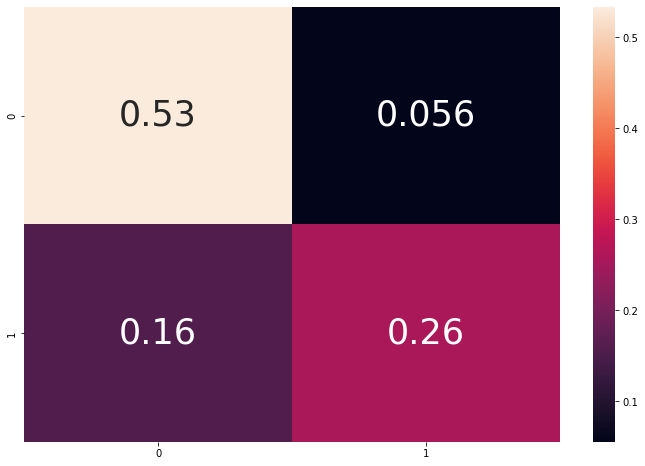

In [162]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':35})

[0.04013893 0.02223944 0.03126286 0.0207065  0.04559824 0.03280937
 0.03202242 0.11477925 0.04019773 0.03531563 0.02790046 0.5570292 ]


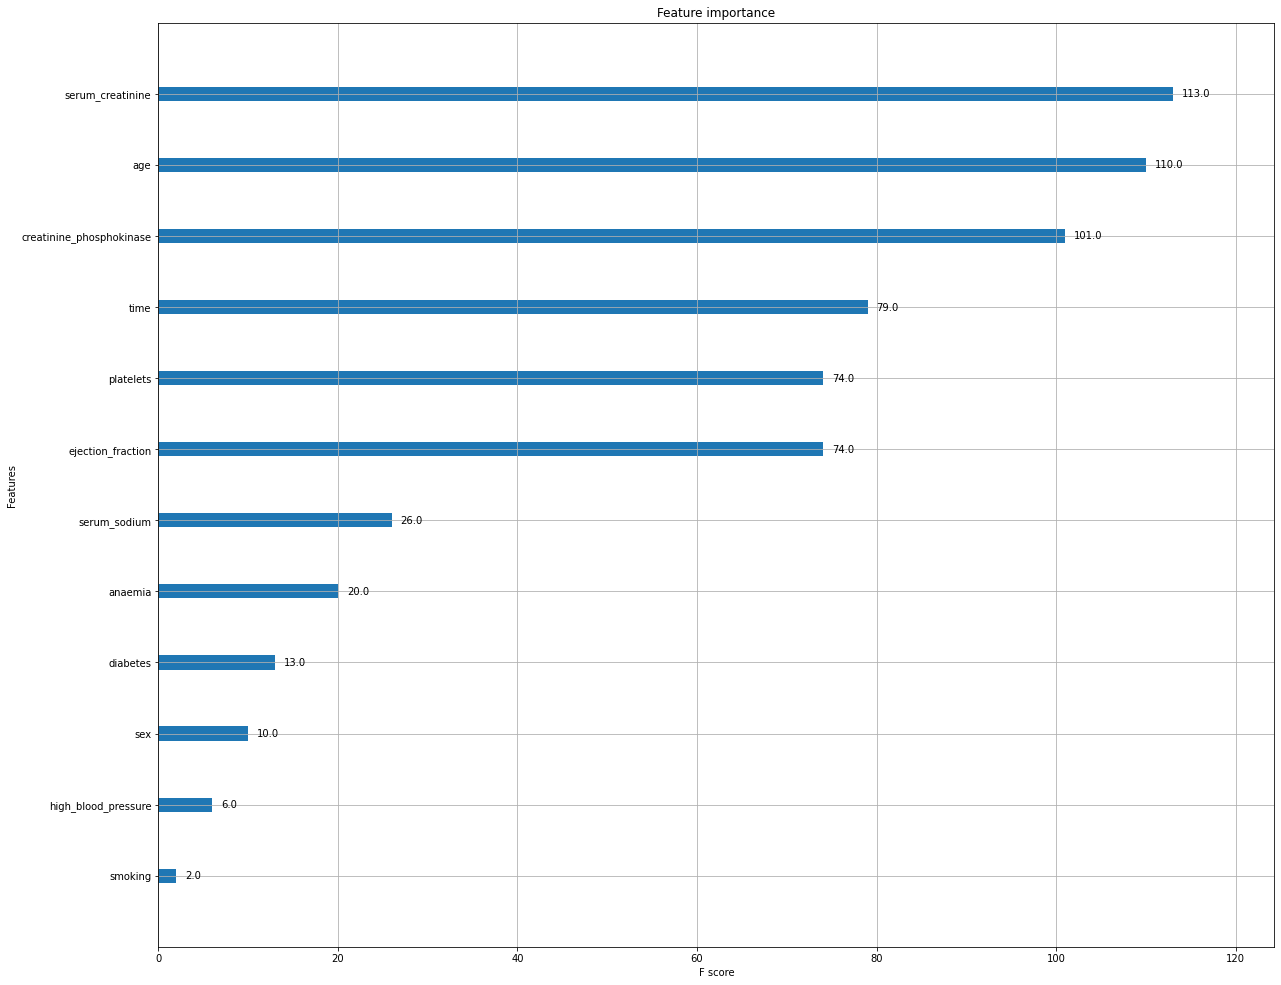

In [163]:
from xgboost import plot_importance


print(model.feature_importances_)
plt.rcParams["figure.figsize"] = (20, 17)
plot_importance(model)
plt.show()
